# Challenge: Advanced Regression
Unit 3 / Lesson 3 / Project 4

Now that you have two new regression methods at your fingertips, it's time to give them a spin.
In fact, for this challenge, let's put them together!
Pick a dataset of your choice with a binary outcome and the potential for at least 15 features.
If you're drawing a blank, the [crime rates in 2013](https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table_8_offenses_known_to_law_enforcement_by_state_by_city_2013.xls/view) dataset has a lot of variables that could be made into a modelable binary outcome.

Engineer your features, then create three models.
Each model will be run on a training set and a test-set (or multiple test-sets, if you take a folds approach).
The models should be:
- Vanilla logistic regression
- Ridge logistic regression
- Lasso logistic regression

If you're stuck on how to begin combining your two new modeling skills, here's a hint: the [SKlearn LogisticRegression method](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) has a "penalty" argument that takes either `l1` or `l2` as a value.

In your report, evaluate all three models and decide on your best.
Be clear about the decisions you made that led to these models (feature selection, regularization parameter selection, model evaluation criteria) and why you think that particular model is the best of the three.
Also reflect on the strengths and limitations of regression as a modeling approach.
Were there things you couldn't do but you wish you could have done?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing

In [2]:
# import data
PATH = (
    r'C:\Users\Aaron\Thinkful\Data Bootcamp\Unit_2_Supervised_Learning\Lesson_5_Evaluating_Linear_Regression_Models\assets\ny_crime_data_2013.xls'
)
df = pd.read_excel(PATH, header=4, skipfooter=3).drop(
    'Rape\n(revised\ndefinition)1', axis=1)

col_list = ['city', 'pop', 'violent_crime', 'murder', 'rape', 'robbery', 'assault',
           'property_crime', 'burglary', 'larceny', 'gta', 'arson']
df.columns = col_list
df.head()

,city,pop,violent_crime,murder,rape,robbery,assault,property_crime,burglary,larceny,gta,arson
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0.0
2,Akron Village,2846,3,0,0,0,3,16,1,15,0,0.0
3,Albany,97956,791,8,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,23,0,3,4,16,223,53,165,5,NaN


For this project we'll use the FBI property crime data that we've worked with before.

In [3]:
# isolate numerical data
df_features = df.iloc[:,1:]

# convert continuous feature data to categorical 0/1
for n in ['murder', 'rape', 'robbery', 'assault', 'burglary', 'larceny', 'gta', 'arson']:
    df_features[str(n)] = np.where(df_features[str(n)] >= 1, 1, 0)
    
df_features.head()

,pop,violent_crime,murder,rape,robbery,assault,property_crime,burglary,larceny,gta,arson
0,1861,0,0,0,0,0,12,1,1,0,0
1,2577,3,0,0,0,1,24,1,1,1,0
2,2846,3,0,0,0,1,16,1,1,0,0
3,97956,791,1,1,1,1,4090,1,1,1,0
4,6388,23,0,1,1,1,223,1,1,1,0


In [4]:
# perform log transformation on population and property crime features
df_features['log_pop'] = np.log1p(df_features['pop']) 
df_features['log_pcrime'] = np.log1p(df_features['property_crime'])
df_features.head()

,pop,violent_crime,murder,rape,robbery,assault,property_crime,burglary,larceny,gta,arson,log_pop,log_pcrime
0,1861,0,0,0,0,0,12,1,1,0,0,7.529406,2.564949
1,2577,3,0,0,0,1,24,1,1,1,0,7.854769,3.218876
2,2846,3,0,0,0,1,16,1,1,0,0,7.954021,2.833213
3,97956,791,1,1,1,1,4090,1,1,1,0,11.492284,8.316545
4,6388,23,0,1,1,1,223,1,1,1,0,8.762333,5.411646


### Linear Regression

In [5]:
# scale values
names = df_features.columns
df_features = pd.DataFrame(preprocessing.scale(df_features), columns=names)

df_features.head()

C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


,pop,violent_crime,murder,rape,robbery,assault,property_crime,burglary,larceny,gta,arson,log_pop,log_pcrime
0,-0.084952,-0.071711,-0.404820,-0.840168,-1.226213,-2.067058,-0.102057,0.253417,0.143275,-1.655879,-0.428571,-1.147551,-1.283651
1,-0.083359,-0.070644,-0.404820,-0.840168,-1.226213,0.483779,-0.100488,0.253417,0.143275,0.603909,-0.428571,-0.885888,-0.896389
2,-0.082760,-0.070644,-0.404820,-0.840168,-1.226213,0.483779,-0.101534,0.253417,0.143275,-1.655879,-0.428571,-0.806068,-1.124783
3,0.128882,0.209662,2.470231,1.190238,0.815519,0.483779,0.431104,0.253417,0.143275,0.603909,-0.428571,2.039466,2.122504
4,-0.074878,-0.063529,-0.404820,1.190238,0.815519,0.483779,-0.074471,0.253417,0.143275,0.603909,-0.428571,-0.156009,0.402192


In [6]:
# run our updated model for comparison

data = df_features[['log_pop', 'robbery', 'rape', 'assault', 'burglary', 'larceny', 'gta']]
target = df_features.log_pcrime

# define training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)

# instantiate our linear regression model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

# Display.
print('Linear Regression')
print('\nR-squared training set:')
print(reg.score(X_train, y_train))

#Store the parameter estimates.
origparams = np.append(reg.coef_, reg.intercept_)
print('\nParameter estimates:')
print(origparams)

print('\nR-squared test set:')
print(reg.score(X_test, y_test))

Linear Regression

R-squared training set:
0.8783434627111149

Parameter estimates:
[ 0.54125356  0.17796957  0.14884423  0.09044259  0.08986802  0.13486895
  0.07711226 -0.01206648]

R-squared test set:
0.8568911020238614


This is our previous linear regression model we used previously.
We can use this model as our "benchmark", either are new regression models perform better or worse than this model. One caveat being that our new models will be more complex.

### Logistic Regression
For our Logistic Regression we'll have to set a binary value.
In our case, we'll establish a categorical 'high crime' value that is a binary measure of all property crime values more than one standard deviation above the mean.

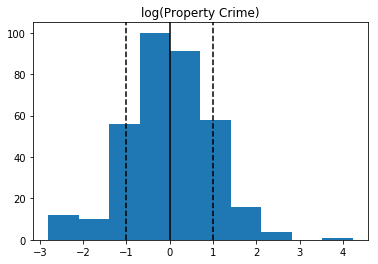

In [7]:
log_pcrime_mean = df_features['log_pcrime'].mean()
log_pcrime_std = df_features['log_pcrime'].std()

# visualize property crime
plt.hist(df_features['log_pcrime']);
plt.axvline((log_pcrime_mean+log_pcrime_std), color='k', linestyle='--')
plt.axvline((log_pcrime_mean-log_pcrime_std), color='k', linestyle='--')
plt.axvline(log_pcrime_mean, color='k', linestyle='-')
plt.title("log(Property Crime)")
plt.show()

In [8]:
# define 'high property crime' feature
df_features['high_pcrime'] = np.where(
    df_features['log_pcrime'] > (log_pcrime_mean+log_pcrime_std), 1, 0
)

df_features['high_pcrime'].value_counts()

0    298
1     50
Name: high_pcrime, dtype: int64

In [9]:
from sklearn.linear_model import LogisticRegression
# Declare a logistic regression classifier.
lr = LogisticRegression()
target = df_features['high_pcrime']
data = df_features[['log_pop', 'robbery', 'rape', 'assault', 'burglary', 'larceny', 'gta']]

# define training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)

# Fit the model.
fit = lr.fit(X_train,y_train)

# Display.
print('Logistic Regression')
print('\nR-squared training set:')
print(lr.score(X_train, y_train))

#Store the parameter estimates.
origparams = np.append(lr.coef_, lr.intercept_)
print('\nParameter estimates:')
print(origparams)

print('\nR-squared test set:')
print(lr.score(X_test, y_test))

Logistic Regression

R-squared training set:
0.9244604316546763

Parameter estimates:
[ 2.38208167  0.42531497  0.44157979 -0.09343213 -0.41727008 -0.20945788
  0.12054771 -3.37178372]

R-squared test set:
0.9285714285714286


C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


It looks like our Logistic Regression performed very well.
Our R-Squared values are much higher than our Linear model and consistent across our training and test data.

### Ridge Regression
For our Ridge Regression we'll have to determine the optimal alpha to use.
First let's perform our regression with an arbitrary alpha, `3.5`.

In [10]:
data = df_features[['log_pop', 'robbery', 'rape', 'assault', 'burglary', 'larceny', 'gta']]
target = df_features.log_pcrime

# define training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)

# instantiate ridge regression
ridge = linear_model.Ridge(alpha=3.5)
ridge.fit(X_train, y_train)

# display
print('Ridge Regression')
print('\nR-squared training set:')
print(ridge.score(X_train, y_train))

#Store the parameter estimates.
origparams = np.append(ridge.coef_, ridge.intercept_)
print('\nParameter estimates:')
print(origparams)

print('\nR-squared test set:')
print(ridge.score(X_test, y_test))

print('\nRidge regression alpha:')
print(3.5)

Ridge Regression

R-squared training set:
0.8782725019531828

Parameter estimates:
[ 0.52920404  0.17939277  0.15153697  0.09176913  0.09122739  0.13339874
  0.07984936 -0.01219334]

R-squared test set:
0.8560425851444073

Ridge regression alpha:
3.5


Let's see how our model performs when we supply a range of alpha values to choose from.

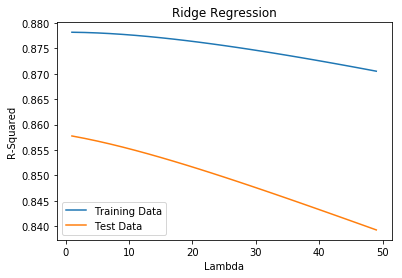

In [11]:
data = df_features[['log_pop', 'robbery', 'rape', 'assault', 'burglary', 'larceny', 'gta']]
target = df_features.log_pcrime

# define training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)

# define empty list
alphas = []
#y_preds = []
train_scores = []
test_scores = []

#Run the model for many alphas.
for lambd in range(1, 50, 2):
    ridge = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridge.fit(X_train, y_train)
    alphas.append(lambd)
    #y_pred = ridge.predict(X_test)
    #y_preds.append(y_pred)
    train_scores.append(ridge.score(X_train, y_train))
    test_scores.append(ridge.score(X_test, y_test))
    
#score_diff = []
#for x in train_scores:
#    for y in test_scores:
#        score_diff.append(x-y)

plt.plot(alphas, train_scores, label='Training Data')
plt.plot(alphas, test_scores, label='Test Data')
plt.title('Ridge Regression')
plt.xlabel('Lambda')
plt.ylabel('R-Squared')
plt.legend()
plt.show();

In our above chart we can see that as alpha values increase, our model's performance decreases.
We'll want to use a lower alpha to optimize our model's performance.

Why trust our calculations, though?
Let's use sklearn's build in `RidgeCV` regression that cross-validates alpha scores across a supplied range.

In [12]:
data = df_features[['log_pop', 'robbery', 'rape', 'assault', 'burglary', 'larceny', 'gta']]
target = df_features.log_pcrime

# define training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)

# instantiate ridgeCV regression
alpha_list = range(1, 50, 2)
ridge = linear_model.RidgeCV(alphas=alpha_list, cv=5)
ridge.fit(X_train, y_train)

# Display
print('Ridge Regression')
print('\nR-squared training set:')
print(ridge.score(X_train, y_train))

#Store the parameter estimates.
origparams = np.append(ridge.coef_, ridge.intercept_)
print('\nParameter estimates:')
print(origparams)

print('\nR-squared test set:')
print(ridge.score(X_test, y_test))

print('\nRidge regression alpha:')
print(ridge.alpha_)

Ridge Regression

R-squared training set:
0.8780756238347124

Parameter estimates:
[ 0.51794496  0.18062547  0.1539313   0.09302342  0.09245697  0.13199343
  0.08237705 -0.01231479]

R-squared test set:
0.8550409492302948

Ridge regression alpha:
7


From our supplied range of alpha scores, sklearn used `RidgeCV` to optimize for an alpha of 7.
Let's see how our optimal alpha performs with a Lass Regression model.

### Lasso Regression

In [13]:
data = df_features[['log_pop', 'robbery', 'rape', 'assault', 'burglary', 'larceny', 'gta']]
target = df_features.log_pcrime

# define training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)

# instantiate a lasso regression
# set alpha to our alpha optimized from RidgeCV
lambd = ridge.alpha_
lass = linear_model.Lasso(alpha=lambd)
lassfit = lass.fit(X_train, y_train)

# Display
print('Lasso Regression')
print('\nR-squared training set:')
print(lass.score(X_train, y_train))

origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

print('\nR-squared test set:')
print(lass.score(X_test, y_test))

Lasso Regression

R-squared training set:
0.0

Parameter estimates for the model with few features:
[ 0.          0.          0.          0.          0.          0.
  0.         -0.03727777]

R-squared test set:
-0.031017259092313454


That's not very good.
Looks like we're going to have to start over and optimize alpha for our Lass Regression.
Let's start by supplying a range of alpha values to our model.

C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


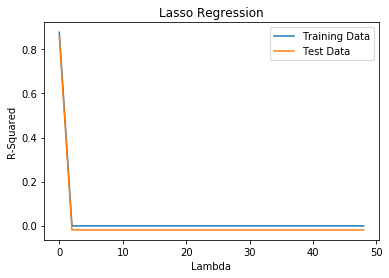

In [14]:
data = df_features[['log_pop', 'robbery', 'rape', 'assault', 'burglary', 'larceny', 'gta']]
target = df_features.log_pcrime

# define training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)

# define empty list
alphas = []
train_scores = []
test_scores = []

#Run the model for many alphas.
for lambd in range(0, 50, 2):
    lass = linear_model.Lasso(alpha=lambd, fit_intercept=False)
    lass.fit(X_train, y_train)
    alphas.append(lambd)
    train_scores.append(lass.score(X_train, y_train))
    test_scores.append(lass.score(X_test, y_test))

plt.plot(alphas, train_scores, label='Training Data')
plt.plot(alphas, test_scores, label='Test Data')
plt.title('Lasso Regression')
plt.xlabel('Lambda')
plt.ylabel('R-Squared')
plt.legend()
plt.show();

In the above chart we can see that model accuracy sharply drops off as alpha values increase.
Let's look at our model performance across a lower range of alpha values

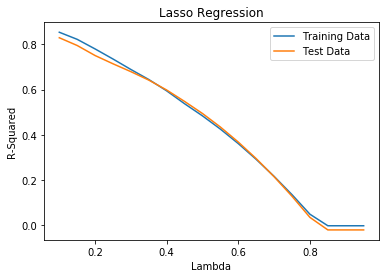

In [15]:
data = df_features[['log_pop', 'robbery', 'rape', 'assault', 'burglary', 'larceny', 'gta']]
target = df_features.log_pcrime

# define training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)

# define empty list
alphas = []
train_scores = []
test_scores = []

#Run the model for many alphas.
for lambd in np.arange(0.1,1,.05):
    lass = linear_model.Lasso(alpha=lambd, fit_intercept=False)
    lass.fit(X_train, y_train)
    alphas.append(lambd)
    train_scores.append(lass.score(X_train, y_train))
    test_scores.append(lass.score(X_test, y_test))

plt.plot(alphas, train_scores, label='Training Data')
plt.plot(alphas, test_scores, label='Test Data')
plt.title('Lasso Regression')
plt.xlabel('Lambda')
plt.ylabel('R-Squared')
plt.legend()
plt.show();

Here's a much clearer idea of what our optimal alpha score is for our Lasso Regression.
Let's use sklearn's `LassoCV` to find our optimal alpha score.

In [16]:
data = df_features[['log_pop', 'robbery', 'rape', 'assault', 'burglary', 'larceny', 'gta']]
target = df_features.log_pcrime

# define training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)

# instantiate a lasso regression
alpha_list = np.arange(0.1,1,.05)
lass = linear_model.LassoCV(alphas=alpha_list, cv=5)
lassfit = lass.fit(X_train, y_train)

# Display
print('Lasso Regression')
print('\nR-squared training set:')
print(lass.score(X_train, y_train))

origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

print('\nR-squared test set:')
print(lass.score(X_test, y_test))

print('\nLasso regression alpha:')
print(lass.alpha_)

Lasso Regression

R-squared training set:
0.8532785352144884

Parameter estimates for the model with few features:
[ 0.53861483  0.14856265  0.09692641  0.06879028  0.05461579  0.06412585
  0.04660119 -0.01367747]

R-squared test set:
0.827460554867679

Lasso regression alpha:
0.1


### Conclusion
All of our models performed very well (eventually... ).
Each had consistently high $R^2$ values across the training and test data without much evidence of overfitting, with the possible exception of the Logistic Regression model.

Our **Logit Regression** had the highest accuracy across all our models (train/test $R^2$ of ~0.924/0.928), but it also had the highest likelihood of correlation.
The model was predicting high property crimes, specifically property crime rates one standard deviation above the mean, and the model used features such as violent crimes, grand theft auto, etc. as predictors.

There's likely a strong correlation between high feature values and high target values, so the model could simply assume that when a feature was one standard deviation above the mean, property crime was also one standard deviation above the mean.

Not a very sophisticated predictive model.

Both our **Ridge Regression** and **Lasso Regression** performed similarly.
Each had consistently high accuracy and performed just as well as our unregularized **Linear Regression**.
Though our Ridge Regression is likely the more robust model if we compare our $\lambda$ value for each model.

Our Ridge Regression had a $\lambda$ value of 7 while our Lasso Regression had a $\lambda$ value of 0.1, that's practically zero.
This means that our Lasso Regression was practically unregularized.

This leaves our Ridge Regression as the our best performing model.
It demonstrated consistent accuracy, failed to exhibit overfitting like our Logit Regression, and due to regularization, is a more robust model than our Linear and Lasso Regressions.